# Assignment 05

This assignment is broken into 3 parts

Upload the notebook assignment05-population.ipynb to you assignments repository.

__Part 1 70%__
Write a jupyter notebook that analyses the differences between the sexes by age in Ireland.

Weighted mean age (by sex)
The difference between the sexes by age
This part does not need to look at the regions.

ie You can take the notebook I used in the lectures and substitute the sexes for the regions.

__Part 2 20%__
In the same notebook, make a variable that stores an age (say 35).

Write that code that would group the people within 5 years of that age together, into one age group 

Calculate the population difference between the sexes in that age group.

__Part 3 10%__
In the same notebook.

Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group



_need to edit the weekly lecture notebook for this assignment, using as a base to go from_

# Part 1:

Set up parameters. Import libraries and read in the Dataset from the URL from the CSO Website. Lets take a look at the last few rows using df.tail() to make sure data loads, see what the data looks like. This gives us a view of the columns espeically, so it is easier to see what we will use and what we will remove for the assignment.

In [1]:

# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# read in dataset from the CSO website.
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
df = pd.read_csv(url)

# Inspect the last few rows
df.tail(3)

,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
9789,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-149d-13a3-e055-000000000001,Cavan County Council,Number,12
9790,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-14a4-13a3-e055-000000000001,Donegal County Council,Number,31
9791,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-1495-13a3-e055-000000000001,Monaghan County Council,Number,7


Now, let's clean up and prepare the dataset. We are going to drop unwanted columns and focus on the columns Sex and Single Year of Age. We are going to replace Under 1 year to 0 so that all the ages are numeric.

In [2]:
# Drop columns not being used.
# Using a list to store column names to be dropped.
drop_col_list = [
    'STATISTIC', 'Statistic Label', 'TLIST(A1)',
    'CensusYear', 'C02199V02655', 'C02076V03371',
    'C03789V04537', 'UNIT'
]

# implace=True to make sure changes are saved.
df.drop(columns=drop_col_list, inplace=True) 

# Remove "All ages" category
df = df[df["Single Year of Age"] != "All ages"]

# Replace text and convert "Single Year of Age" to numeric
df['Single Year of Age'] = df['Single Year of Age'].str.replace('Under 1 year', '0')
df['Single Year of Age'] = df['Single Year of Age'].str.replace(r'\D', '', regex=True)

df['Single Year of Age'] = df['Single Year of Age'].astype('int64')
df['VALUE'] = df['VALUE'].astype('int64')

print("Cleaned dataset info:")
df.info()


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 9696 entries, 32 to 9791
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex                      9696 non-null   object
 1   Single Year of Age       9696 non-null   int64 
 2   Administrative Counties  9696 non-null   object
 3   VALUE                    9696 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 378.8+ KB


Now lets look at creating a pivot table by the Sex and the Age. Will use the pd.pivot_table() method - see [Pandas Doc](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) for reference.

In [3]:
df_anal = pd.pivot_table(df, 'VALUE',"Single Year of Age","Sex")
print (df_anal.head(3))

Sex                 Both sexes     Female       Male
Single Year of Age                                  
0                     3612.250  1761.6250  1850.6250
1                     3526.250  1721.5625  1804.6875
2                     3700.625  1810.8750  1889.7500


Pull the column headers and created variables for them. 

In [4]:
# Get the column headers from the pivot table.
headers = list(df_anal.columns)
Both_sexes = headers[0]
Females = headers[1]
Males = headers[2]

# Created variables for each sex category. 
Both_sexes_data = df_anal[Both_sexes]
Females_data = df_anal[Females]
Males_data = df_anal[Males]


Get the Weighted Mean

Weighted mean is sum(age*population at age) / sum (populations at age)

In [5]:
# using df_anal[].sum() to get total population.

number_people = df_anal[Both_sexes].sum()
number_people

321821.1875

In [6]:
# print out the dataframe to check 

df_anal

Sex,Both sexes,Female,Male
Single Year of Age,,,
0,3612.2500,1761.6250,1850.6250
1,3526.2500,1721.5625,1804.6875
2,3700.6250,1810.8750,1889.7500
3,3780.2500,1842.6875,1937.5625
4,3844.0625,1863.6875,1980.3750
...,...,...,...
96,80.1875,59.7500,20.4375
97,59.3125,45.7500,13.5625
98,38.8750,30.7500,8.1250


Use numpy.average() to calculate the weighted mean. [Numpy Doc](https://numpy.org/doc/stable/reference/generated/numpy.average.html) for reference.

In [7]:
# use numpy to calculate the weighted mean of both sexes.
# df_anal.index is the age

weighted_mean_Both_sexes = np.average(df_anal.index, weights=df_anal[Both_sexes])
weighted_mean_Both_sexes

38.34662008541622

Now calculate the weighted mean of male and female seperately

In [8]:
# df.anal.index.astype(int) to convert index to integer for ages. 
# This will help in calculating weighted mean.
ages = df_anal.index.astype(int)


# use numpy.average() to calculate the weighted mean for males and females, seperately.
weighted_mean_male = np.average(ages, weights=df_anal[Males])
weighted_mean_female = np.average(ages, weights=df_anal[Females])

print(f"Weighted mean age (Males): {weighted_mean_male:.2f}")
print(f"Weighted mean age (Females): {weighted_mean_female:.2f}")



Weighted mean age (Males): 37.74
Weighted mean age (Females): 38.94


Now calculate the difference of Females and Males by age

In [9]:
# Calculate the difference between Females and Males by age.
df_anal['Difference'] = df_anal[Females] - df_anal[Males]

# Take a look at the first 3 rows to check. 
df_anal['Difference'].head(3)

Single Year of Age
0   -89.000
1   -83.125
2   -78.875
Name: Difference, dtype: float64

In [10]:

# Print the difference in male and female population.
df_male_total = df_anal[Males].sum()
df_female_total = df_anal[Females].sum()   

# abs() to get absolute value of difference.
df_difference = abs(df_female_total - df_male_total)

# Print the absolute difference.
# Use , to format with commas and .0f to show no decimal places.
print(f"Absolute difference between female and male population: {df_difference:,.0f}")



Absolute difference between female and male population: 3,753


Lets look at getting the average age for female

In [11]:
# Get the average age for females
weighted_mean_female = np.average(df_anal.index, weights=df_anal['Female'])
weighted_mean_female

38.9397958987787

and now male 

In [12]:
# get the average age for males
weighted_mean_male = np.average(df_anal.index, weights=df_anal['Male'])
weighted_mean_male  

37.7394477371039

Visualisation of the difference between females and males by age In Ireland by bar chart

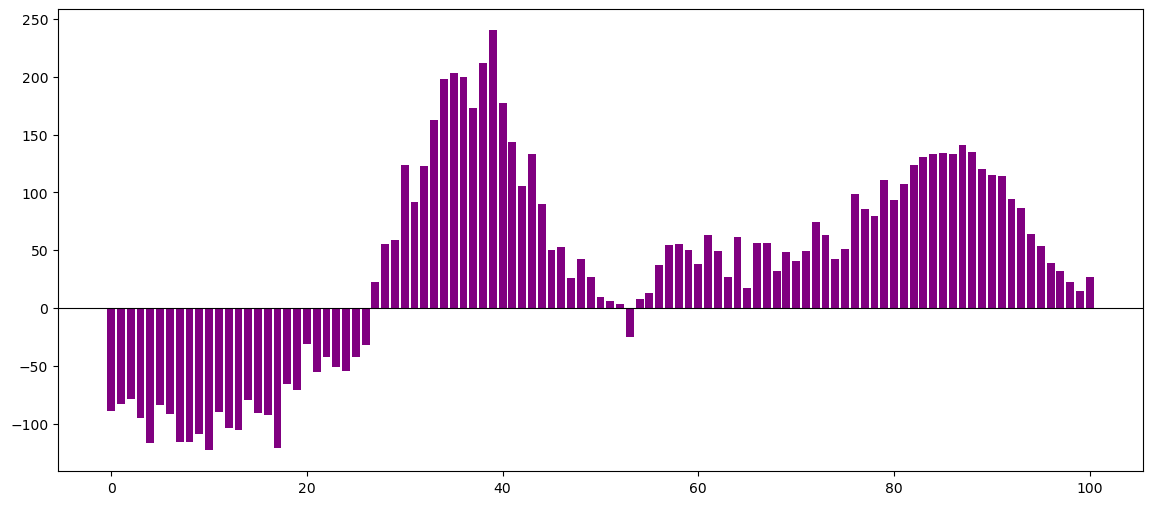

In [13]:
# Now to visualise the difference between male and female population using a bar chart.
bar_width = 0.50
ages_numeric = df_anal.index.astype(int)
plt.figure(figsize=(14, 6))
plt.bar(ages_numeric, df_anal['Difference'], color='purple') 
plt.axhline(0, color='black', linewidth=0.8)    

## Part 2: 